# I. Gradient Descent Multivariat

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
table = np.genfromtxt('data_multivariat.txt', delimiter=',')
X = table[:, 0:2]
y = table[:, -1]
y = np.array(y)


## A. Fungsi Perhitungan Gradient Descent

Buat suatu fungsi berisi algoritma Gradient Descent untuk menghitung parameter model linear dengan $n$ fitur dan $m$ instance data berikut:

$$
h_\mathbf{\theta}(\mathbf{x}) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_2x_2.
$$

Input fungsi adalah sebagai berikut:
* Matriks $X$ berukuran $m\times n$. Elemen baris ke $i$ dan kolom ke $j$ dari matriks, yaitu $x^{(i)}_j$, adalah instance ke $i$ dari data latih pada fitur ke $j$, untuk setiap $i=1,2,\dots, m$ dan $j=1,2,\dots,n$.
* Vektor $y$ berukuran $m$. Elemen ke $i$ dari vektor $y$, yaitu $y^{(i)}$ adalah nilai variabel output untuk instance data ke $i$, untuk setiap $i=1,2,\dots, m$.
* ```NumIterations```, yaitu banyaknya perulangan yang dilakukan pada algoritma Gradient Descent.
* ```alpha```, yaitu besarnya *learning rate*.

Output fungsi adalah sebuah matriks $\Theta$ berukuran ```NumIterations```$\times (n+1)$. Elemen pada baris ke $k$ dan kolom ke $j$ dari matriks tersebut, yaitu $\theta_{kj}$, adalah parameter ke $j$ dari model linear yang diperoleh pada iterasi ke $k$ dari algoritma Gradient Descent; untuk semua $j=0,1,\dots,n$ dan $k=1,2,\dots,$```NumIterations```.

In [3]:
# Manual Grad Descent
import time
start = time.time()
def multi_func(theta0, theta1, theta2, x1, x2):
    return theta0 + theta1*x1 + theta2*x2



numIterations = 10000
alpha = 1e-7

def GradDesc(X, y, numIterations, alpha):
    theta0 = 0
    theta1 = 0
    theta2 = 0
    Theta = list()
    m, n = np.shape(X)
    # gunakan nilai theta awal semua nilainya 0
    theta = np.zeros((m, 1))
    one = np.ones((m,1 ))
    # modifikasi matriks X agar memuat nilai x_0 dummy untuk setiap instance data
    X = np.concatenate((one, X), axis = 1)
    for i in range(numIterations):
        Theta.append([theta0, theta1, theta2])
        prev_theta0 = theta0
        prev_theta1 = theta1
        prev_theta2 = theta2
        theta0 = theta0 - alpha*(1/m)*sum(multi_func(prev_theta0, prev_theta1, prev_theta2, X[0:, 1], X[0:, 2]) - y)
        theta1 = theta1 - alpha*(1/m)*sum(((multi_func(prev_theta0, prev_theta1, prev_theta2, X[0:, 1], X[0:, 2]) - y))*X[0:, 1])
        theta2 = theta2 - alpha*(1/m)*sum(((multi_func(prev_theta0, prev_theta1, prev_theta2, X[0:, 1], X[0:, 2]) - y))*X[0:, 2])
        
    Theta.append([theta0, theta1, theta2])

    Theta = np.array(Theta)
    return Theta

Theta = GradDesc(X, y, numIterations, alpha)
print(Theta)
print(time.time() - start)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.40412660e-02 7.64209128e+01 1.12036770e-01]
 [5.27931073e-02 1.17528875e+02 1.73069931e-01]
 ...
 [9.60026936e+00 1.65354770e+02 1.68224004e+01]
 [9.60122212e+00 1.65354767e+02 1.68240581e+01]
 [9.60217488e+00 1.65354765e+02 1.68257159e+01]]
0.3526272773742676


## B. Versi Tervektorisasi
Buatlah algoritma Gradient Descent dalam bentuk yang tervektorisasi (semua operasi didefinisikan dalam operasi vektor dan matriks).

Pada setiap iterasinya, ketika mengkomputasi nilai gradien sebagai berikut:

$$
\dfrac{\partial J(\mathbf{\Theta})}{\partial \theta_j}= \dfrac{1}{m}\sum\limits_{i=1}^m(h_{\mathbf{\theta}}(\mathbf{x}^{(i)})-y^{(i)})x_j^{(i)}, \qquad \text{ untuk semua }j=0,1,\dots m,
$$

keseluruhan perhitungan sebetulnya dapat diekspresikan sebagai beberapa operasi matriks. Misalkan kita definisikan beberapa notasi berikut.

$$
\mathbf{\Theta}=\begin{bmatrix}
\theta_0\\ 
\theta_1\\ 
\vdots \\
\theta_n
\end{bmatrix}, \qquad
\nabla J = \begin{bmatrix}
\dfrac{\partial J(\mathbf{\Theta})}{\partial \theta_0}\\
\dfrac{\partial J(\mathbf{\Theta})}{\partial \theta_1}\\
\vdots \\
\dfrac{\partial J(\mathbf{\Theta})}{\partial \theta_n}
\end{bmatrix}.
$$

Maka, (cek!)

$$
\nabla J = X^T(X\mathbf{\Theta}-\mathbf{y})/m
$$

Sehingga perhitungan update nilai $\theta$ dapat dilakukan dalam bentuk vektor sebagai berikut:

$$
\mathbf{\Theta} := \mathbf{\Theta} - \alpha \nabla J.
$$

Perhitungan dengan bentuk vektor semacam ini memiliki keuntungan sebagai berikut:
* Penulisan kode menjadi sangat ringkas. (perhitungan di atas dapat ditulis hanya dengan 1 baris kode saja)
* Perhitungan dengan Numpy telah teroptimisasi untuk perhitungan operasi matriks. Artinya, running time algoritma yang ditulis dalam bentuk tervektorisasi (semuanya murni dalam operasi matriks/vektor) akan secara signifikan jauh lebih cepat dibanding perhitungan yang dilakukan dengan menggunakan desain for-loop manual.

In [4]:
# Vectorised Grad Descent
import time
start = time.time()
numIterations = 10000
alpha = 1e-7

def GradDescVect(X, y, numIterations, alpha):
    m, n = np.shape(X)
    Theta = list()
    theta = np.zeros(n+1)
    # gunakan nilai theta awal semua nilainya 0
    one = np.ones((m,1 ))

    
    # modifikasi matriks X agar memuat nilai x_0 dummy untuk setiap instance data
    X = np.concatenate((one, X), axis = 1)

    for i in range(numIterations):
        Theta.append(theta)
#         theta = theta - alpha*(np.matmul(X.transpose(), np.matmul(X, theta) - y)/m)
        theta = theta - alpha*(X.T.dot((X.dot(theta) - y))/m)
        
        ### Tantangan: tuliskan keseluruhan perhitungan hanya dalam 1 baris saja
    Theta.append(theta)
    return np.array(Theta)

Theta_vect = GradDescVect(X, y, numIterations, alpha)
print(Theta_vect)
print(time.time() - start)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.40412660e-02 7.64209128e+01 1.12036770e-01]
 [5.27931073e-02 1.17528875e+02 1.73069931e-01]
 ...
 [9.60026936e+00 1.65354770e+02 1.68224004e+01]
 [9.60122212e+00 1.65354767e+02 1.68240581e+01]
 [9.60217488e+00 1.65354765e+02 1.68257159e+01]]
0.06630563735961914


Bandingkan waktu performa kedua algoritma tersebut. Buatlah kesimpulan.

### Kesimpulan:

Dari kedua algoritma tersebut, sudah jelas vectorised gradient descent lebih cepat dari manual gradient descent. Secara rata - rata, manual gradient descent memakan waktu 0.2 detik, sedangkan vectorised gradient descent rata - rata memakan waktu 0.04 - 0.05 second (tergantung menggunakan metode mat mul atau .dot). Sehingga algoritma vectorised gradient descent lebih baik.


## C. Fungsi Plot 3D

Buatlah fungsi untuk membuat plot 3 dimensi untuk regresi linear dengan dua fitur (plot tidak bisa dibuat untuk data latih dengan lebih dari 2 fitur).

Input:
* Matriks $X$ berukuran $m\times 2$. Elemen baris ke $i$ dan kolom ke $j$ dari matriks, yaitu $x^{(i)}_j$, adalah instance ke $i$ dari data latih pada fitur ke $j$, untuk setiap $i=1,2,\dots, m$ dan $j=1,2,\dots,n$.
* Vektor $\mathbf{y}$ berukuran $m$. Elemen ke $i$ dari vektor $y$, yaitu $y^{(i)}$ adalah nilai variabel output untuk instance data ke $i$, untuk setiap $i=1,2,\dots, m$.
* vektor $\mathbf{\Theta}$ berukuran 3.

Output:
Sebuah grafik 3D yang berisi:
* Scatter plot titik-titik data latih $X$ dan $\mathbf{y}$.
* Bidang linear hasil model regresi dengan $\mathbf{\Theta}$ sebagai parameter-parameternya.

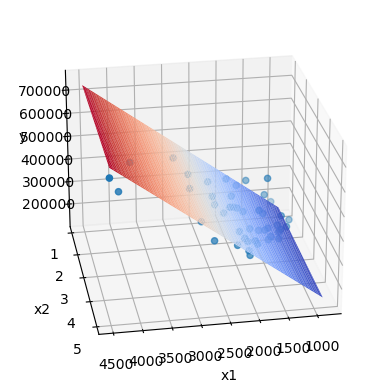

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_solution(X, y, theta):
    
    # Define the function to be plotted
    def f(x1, x2, theta):
        # This is just an example function - replace it with your own
        return theta[0] + theta[1]*x1 + theta[2]*x2

    # Determine the range of values to be displayed on the axes
    x_lin = np.linspace(min(X[:, 0]), max(X[:, 0]))
    y_lin = np.linspace(min(X[:, 1]), max(X[:, 1]))

    Xgrid, Ygrid = np.meshgrid(x_lin, y_lin)
    Z = f(Xgrid, Ygrid, theta)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y)
    ax.plot_surface(Xgrid, Ygrid, Z, cmap=cm.coolwarm)#, linewidth=0, antialiased=False)
    ax.view_init(25, 80)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    plt.show()


plot_solution(X, y, Theta[-1, :])

## D. Feature Scaling

Implementasikan kembali algoritma Gradient Descent dengan menerapkan teknik preprocessing Feature Scaling.

Setiap instance dari masing-masing fitur akan ditransformasi (diubah nilainya) dengan tujuan agar range nilai data dari masing-masing fitur terseragamkan.

$$
\hat{x}_j^{(i)}:= \dfrac{x_j^{(i)}-\mu_{\mathbf{x}_j}}{\sigma_{\mathbf{x}_j}}, \quad \text{ untuk }j=0, 1, \dots, n.
$$
di mana $\mu_{\mathbf{x}_j}$ dan $\sigma_{\mathbf{x}_j}$ secara berturut-turut adalah rata-rata dan standar deviasi dari semua instace data pada nilai fitur ke $j$ nya.

Teknik di atas disebut sebagai **Normalisasi**. Akan terdapat teknik feature scaling lainnya yang tidak dibahas dalam bagian ini.

**Catatan:** Data yang perlu diskalakan hanya variabel input saja. Nilai variabel output tidak perlu diskalakan.

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

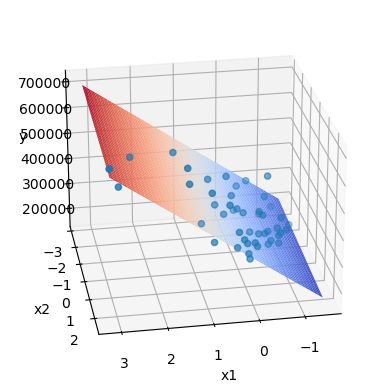

In [6]:
def feature_scaling(X):
    return (X - np.mean(X, axis = 0))/np.std(X, axis = 0)


X_scaled = feature_scaling(X)
print(X_scaled)
# alpha dan NumIterations ditentukan secara spesifik; silakan memodifikasi untuk eksplorasi
Theta_scaled = GradDescVect(X_scaled, y, 10000, 1e-2)
print(Theta_scaled)
plot_solution(X_scaled, y, Theta_scaled[-1, :])

## E. Evaluasi model dengan Fungsi Biaya

Ingat kembali fungsi biaya
$$
J(\theta_0, \dots, \theta_n) = \dfrac{1}{2m}\sum_{i=1}^m(h_{\mathbf{\theta}}(x_0^{(i)}, x_1^{(i)}, \dots, x_n^{(i)})-y^{(i)})^2.
$$

Kita akan menggunakan fungsi biaya tersebut untuk membandingkan model yang dihasilkan dengan dan tanpa teknik feature scaling. Untuk membandingkannya, buatlah grafik nilai fungsi biaya terhadap iterasi untuk kedua algoritma gradient descent. Agar perbedaan terlihat dengan jelas, **jangan masukkan nilai fungsi biaya untuk 100 iterasi pertama**, karena nilainya terlalu besar.

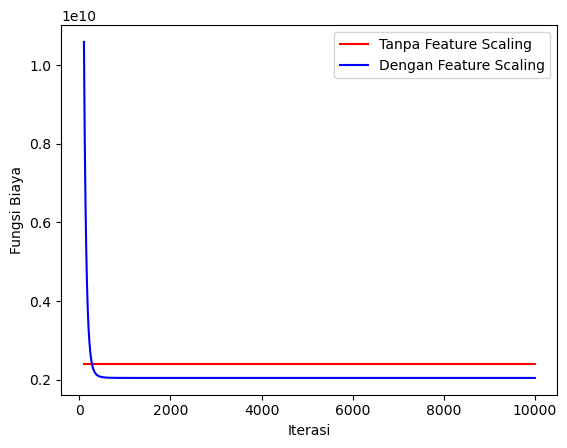

In [7]:
def cost_function(X, y, theta):
    m = len(X)
    X = np.insert(X, 0, 1, axis=1)
    
    return sum((X.dot(theta.T) - y)**2)*(1/(2*m))

# Simpan nilai fungsi biaya untuk seluruh iterasi.
cost_with = [cost_function(X_scaled, y, Theta_scaled[i]) for i in range(numIterations+1)]
cost_without = [cost_function(X, y, Theta[i]) for i in range(numIterations+1)]
x_plot = range(len(Theta_scaled))


plt.plot(x_plot[100:], cost_without[100:], 'r', label = 'Tanpa Feature Scaling')
plt.plot(x_plot[100:], cost_with[100:], 'b', label = 'Dengan Feature Scaling')
plt.legend()
plt.xlabel("Iterasi")
plt.ylabel("Fungsi Biaya")
plt.show()

Tuliskan kesimpulan atas hasil yang Anda peroleh.

### Kesimpulan:

**Dengan adanya feature scaling, data telah dinormalisasikan, sehingga fungsi biaya dapat terlihat dengan lebih jelas (Perbedaan fungsi biaya di setiap iterasi semakin jelas terlihat). Dapat dibandingkan dengan garis tanpa feature scaling yang berupa garis datar. Berpotensi membantu mesin lebih mudah belajar dengan data yang telah terstandarisasi.**

# II. Regresi Linear dengan data Real

Dalam tugas ini, Anda akan mengolah data klaim asuransi serta membangun model Regresi Linear untuk memprediksi besarnya klaim asuransi yang perlu disiapkan oleh perusahaan asuransi ketika menerima nasabah baru.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [9]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## A. Visualisasi Data berdimensi Tinggi

Sebelum menjalankan Regresi Linear, pada umumnya kita perlu memahami natur datanya untuk memastikan bahwa Regresi Linear memang adalah teknik yang tepat untuk jenis data tersebut. Hal ini biasanya dilakukan dengan menggambar grafik datanya. Namun demikian, hal ini menjadi kesulitan ketika data yang perlu digambar memiliki dimensi yang terlalu besar. Untuk mengatasi hal ini, library Seaborn memiliki fitur yang dapat membantu.

Perhatikan contoh berikut.

1000


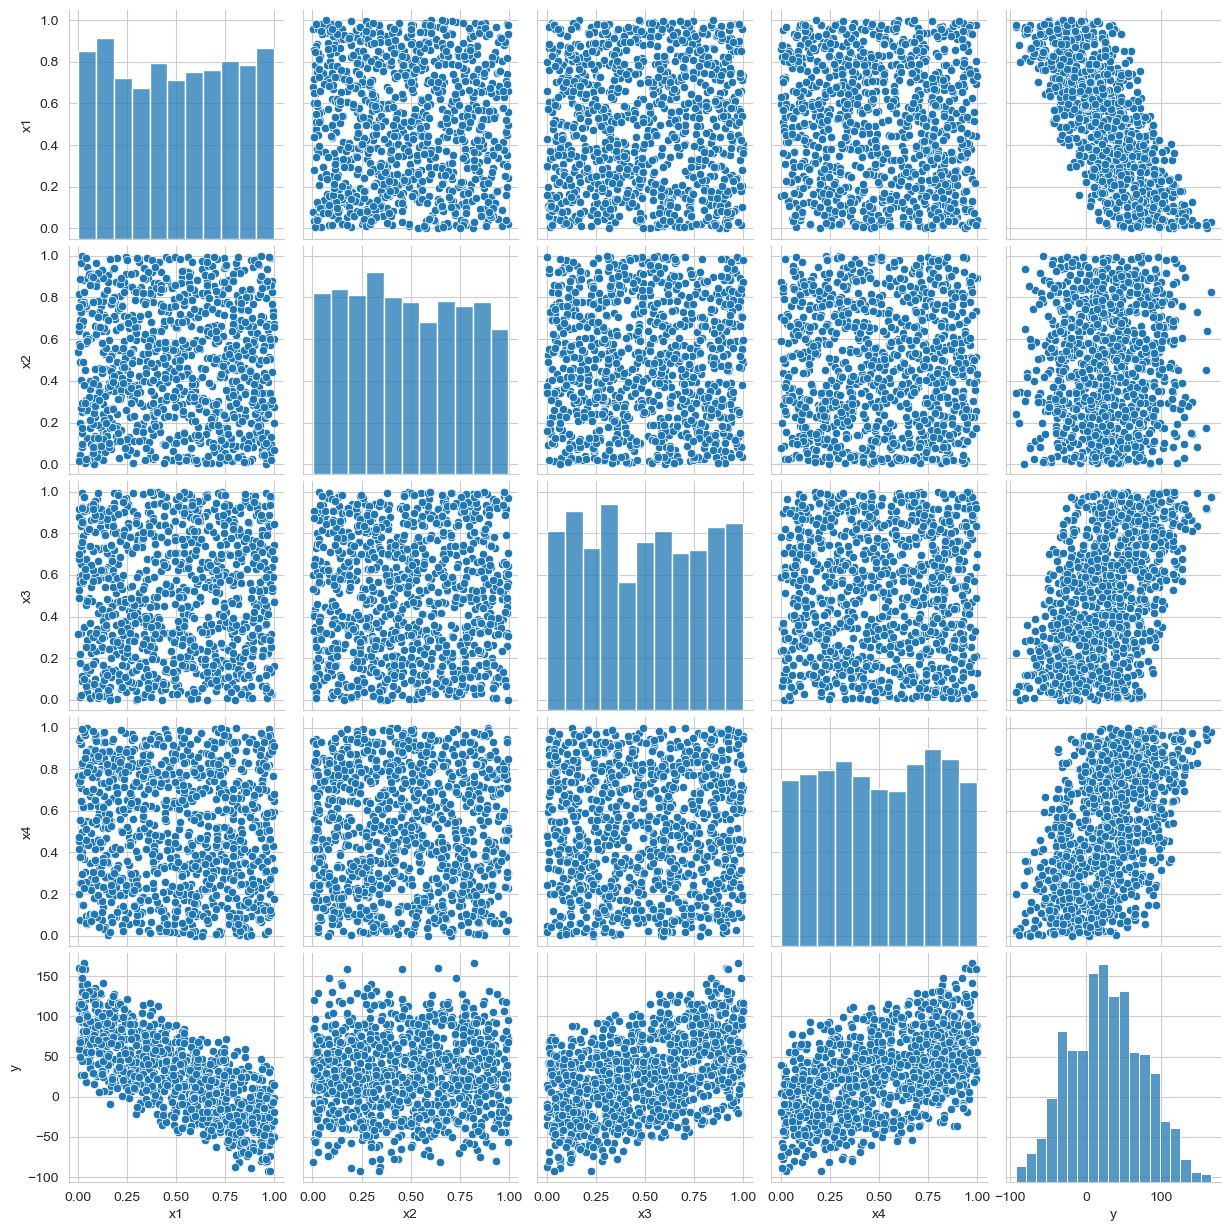

In [10]:
# Kode berikut membangkitkan data acak multidimensi
n = 1000
Xr = np.random.rand(4, n)
print(len(Xr[0]))
y = 10 - 120 * Xr[0, :] + 80 * Xr[2, :] + 75 * Xr[3, :] + 4 * np.random.normal(0, 1, n)
# print(y)
d = {
    "x1": pd.Series(Xr[0, :], index=range(n)),
    "x2": pd.Series(Xr[1, :], index=range(n)),
    "x3": pd.Series(Xr[2, :], index=range(n)),
    "x4": pd.Series(Xr[3, :], index=range(n)),
    "y": pd.Series(y, index=range(n)),
}
df_dumm = pd.DataFrame(d)
df_dumm

# Kode berikut memanggil fitur Seaborn untuk membandingkan hubungan antara fitur
sns.set_style("whitegrid")
sns.pairplot(df_dumm[["x1", "x2", "x3", "x4", "y"]])

**Penjelasan:**
* Terdapat 25 grafik, yang masing-masing merupakan grafik scatter plot untuk setiap dua fitur berbeda dan sebuah histogram untuk dua fitur yang sama (elemen diagonalnya)
* Perhatikan bahwa setiap pasangan nilai $x$ pada grafik di atas terlihat menyebar rata dan seperti tidak ada pola tertentu.
* Namun grafik antara suatu nilai $x$ tertentu dengan $y$ menunjukkan suatu hubungan seperti garis lurus. Artinya masuk akal untuk membuat suatu regresi linear dengan variabel $x$ sebagai inputnya dan $y$ sebagai outputnya.

### Tugas:
Buatlah visualisasi data seperti di atas untuk data klaim asuransi. Ingat bahwa data yang dapat digambar grafiknya hanya data yang bersifat numerik.

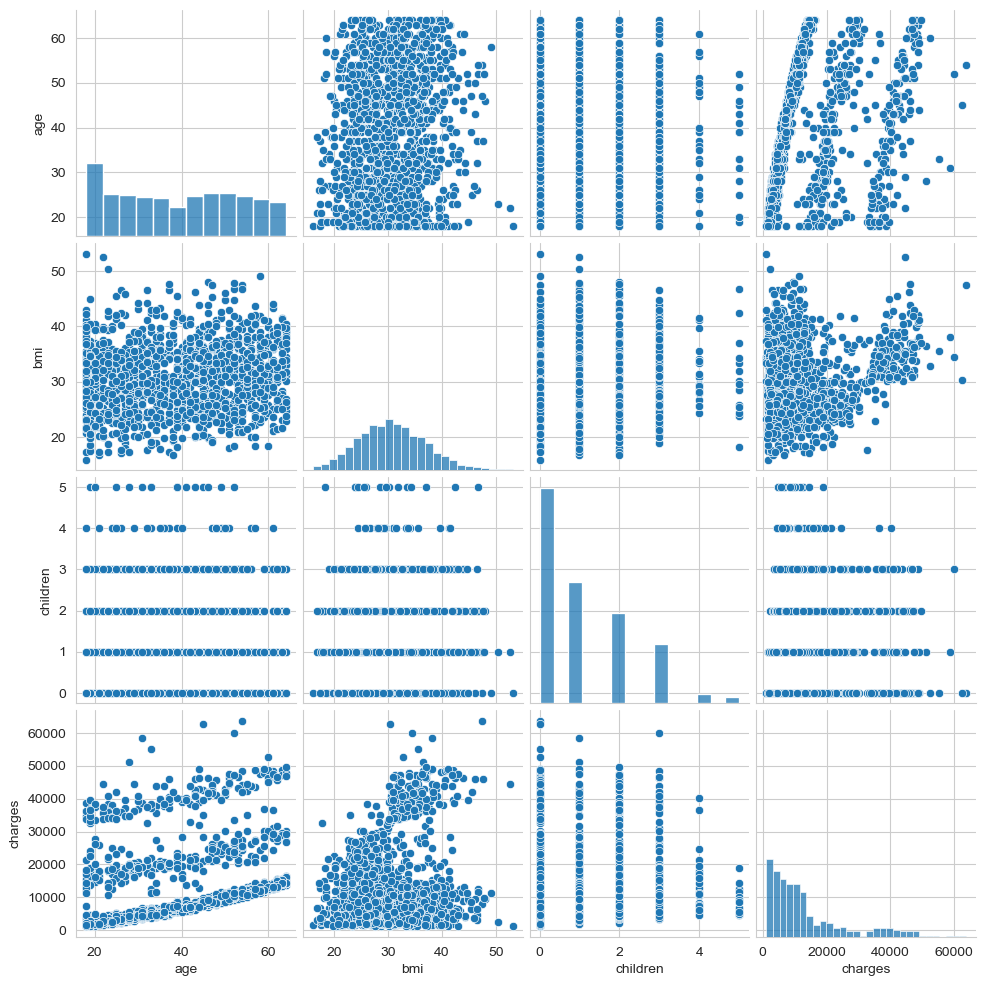

In [11]:
data = pd.read_csv("insurance.csv")

d = {
    "age": pd.Series(data['age'], index=range(len(data['age']))),
    "bmi": pd.Series(data['bmi'], index=range(len(data['bmi']))),
    "children": pd.Series(data['children'], index=range(len(data['children']))),
    "charges": pd.Series(data['charges'], index=range(len(data['charges']))),
}
frame = pd.DataFrame(d)
frame

# Kode berikut memanggil fitur Seaborn untuk membandingkan hubungan antara fitur
sns.set_style("whitegrid")
sns.pairplot(frame[["age", "bmi", "children", "charges"]])

## B. One Hot Encoding untuk Data Kategorial

Dalam data di dunia nyata, seringkali terdapat data yang bersifat kategorial dan bersifat tidak kuantitatif. Data semacam ini tidak bisa diproses oleh tugas Regresi Linear. Namun demikian, seringkali data seperti ini justru memiliki pengaruh yang signifikan terhadap luaran yang diharapkan. Misalkan dalam kasus klaim asuransi, tentu nasabah yang merupakan perokok memiliki kecenderungan untuk memiliki klaim yang lebih besar dibanding nasabah non perokok, karena nasabah perokok biasanya memiliki kesehatan yang cenderung lebih buruk.

Oleh sebab itu, suatu teknik preprocessing perlu dilakukan untuk mengatasi permasalahan ini. Salah satu teknik yang paling umum digunakan adalah teknik *One Hot Encoding*, di mana suatu fitur bertipe data kategorial dengan $k$ buah kategori berbeda akan 'dimekarkan' menjadi $k$ buah fitur baru.

Perhatikan contoh berikut.

In [12]:
d = {
    "Tinggi Badan": pd.Series([174.3, 152.5, 163.2, 159.0], index=range(4)),
    "Berat Badan": pd.Series([74.6, 52.2, 63.1, 61.0], index=range(4)),
    "Jenis Kelamin": pd.Series(["Laki-laki", "Perempuan", "Perempuan", "Laki-laki"], index=range(4)),
    "Prodi": pd.Series(["IBDA", "IEE", "IEE", "CFP"], index=range(4)),
}
df = pd.DataFrame(d)
df

,Tinggi Badan,Berat Badan,Jenis Kelamin,Prodi
0,174.3,74.6,Laki-laki,IBDA
1,152.5,52.2,Perempuan,IEE
2,163.2,63.1,Perempuan,IEE
3,159.0,61.0,Laki-laki,CFP


Kode berikut menjalankan teknik one-hot-encoding untuk mengubah semua data kategorial menjadi vektor encoding. Jalankan kode berikut dan pelajari maksud dari teknik ini. Jawablah pertanyaan di bawah ini untuk meningkatkan pemahaman Anda.

In [13]:
df = pd.get_dummies(df)
df

,Tinggi Badan,Berat Badan,Jenis Kelamin_Laki-laki,Jenis Kelamin_Perempuan,Prodi_CFP,Prodi_IBDA,Prodi_IEE
0,174.3,74.6,1,0,0,1,0
1,152.5,52.2,0,1,0,0,1
2,163.2,63.1,0,1,0,0,1
3,159.0,61.0,1,0,1,0,0


Pertanyaan:
1. Setelah dilakukan proses di atas, apakah terjadi perubahan jumlah fitur dalam tabel DataFrame? Ada berapa tambahan fitur yang terjadi?
2. Apa yang menentukan seberapa banyak tambahan fitur tambahan yang diberikan?
3. Apa makna angka 0 dan 1 yang muncul dari kolom fitur yang baru?
4. Untuk setiap baris, mungkinkah semua kolom fitur baru terisi angka 1 semuanya?
5. Untuk setiap baris, mungkinkah semua kolom fitur baru terisi angka 0 semuanya?

1. Terjadi perubahan fitur pada tabel DataFrame, ada 2 pengurangan fitur dan 5 tambahan fitur
2. Yang menentukan berapa banyak tambahan fitur adalah berapa jenis dalam suatu fitur. Contohnya dalam prodi ada 3 jenis yaitu IEE, IBDA, dan CFP maka akan ada 3 fitur yang ditambahkan
3. Angka 0 berarti data tersebut tidak termasuk dalam fitur tersebut dan angka 0 berarti data tersebut masuk kedalam fitur tersebut contohnya angka 0 dalam fitur Prodi_CFP dan angka 1 dalam Prodi_ibda berarti data tersebut tidak termasuk dalam prodi CFP dan termasuk dalam prodi IBDA
4. Tidak karena ada kolom fitur yang memiliki sifat yang berlawanan sehingga tidak mungkin hanya ada angka 1 saja
5. Tidak karena ada kolom fitur yang memiliki sifat yang berlawanan sehingga tidak mungkin hanya ada angka 0 saja

### Tugas:
Lakukan teknik preprocessing One-Hot-Encoding untuk tabel asuransi.

In [14]:
data = pd.read_csv("insurance.csv")

d = {
    "age": pd.Series(data['age'], index=range(len(data['age']))),
    "bmi": pd.Series(data['bmi'], index=range(len(data['age']))),
    "children": pd.Series(data['children'], index=range(len(data['age']))),
    "charges": pd.Series(data['charges'], index=range(len(data['age']))),
    "sex": pd.Series(data['sex'], index=range(len(data['age']))),    
    "smoker": pd.Series(data['smoker'], index=range(len(data['age']))),
    "region": pd.Series(data['region'], index=range(len(data['age']))),
                        }
frame = pd.DataFrame(d)

                        
df = pd.get_dummies(frame)
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


## C. Regresi Linear dengan SK Learn

Berikut langkah-langkah utama yang dilakukan dalam implementasi Regresi Linear dengan kasus nyata:
1. Mendefinisikan variabel input dan ouput ke dalam dua kelompok: a) Data Latih, dan b) Data Uji.
2. Membangun model Regresi Linear dengan SK Learn.
3. Mengevaluasi hasil pembangunan model dengan mengujikan hasil prediksi model ke set Data Uji.
4. Men-deploy model untuk melakukan prediksi.

Akan diberikan contoh melakukan langkah-langkah di atas untuk data ```df_dumm``` seperti di atas. 

**Tugas Anda adalah mereplikasi langkah-langkah tersebut untuk data Klaim Asuransi.**

### C1. Pengelompokan variabel input dan output

Dalam praktek regresi linear, data set yang dimiliki biasanya tidak semuanya digunakan sebagai data latih. Terdapat beberapa di antaranya yang sengaja tidak dimasukkan dalam set data latih untuk memenuhi kebutuhan lain. Dalam modul ini kita hanya akan membahas adanya set data yang akan digunakan sebagai **data uji**, yang tidak termasuk dalam set data latih. Set data uji akan digunakan untuk menguji hasil model yang sudah dilatih dengan menggunakan data latih.

Dalam contoh kali ini, kita akan membagi 1000 instance data ```df_dumm``` secara acak menjadi:
1. 80% di antaranya sebagai **Data Latih**
2. 20% sisanya sebagai **Data Uji**

In [15]:
from sklearn.model_selection import train_test_split

# definisikan keseluruhan variabel input dan output terlebih dahulu
y = df_dumm[["y"]]
X = df_dumm.drop("y", axis = 1)

# pecah dataset ke dalam dua kelompok secara acak
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=1)
# random state dipilih = 1, untuk memberikan suatu realisasi keacakan, namun keacakan tersebut bernilai tetap untuk setiap keberjalanan algoritma

# Berikut adalah Data Latih berisi 800 instance
display(X_train)
display(y_train)

# Berikut adalah Data Uji berisi 200 instance
display(X_test)
display(y_test)

,x1,x2,x3,x4
382,0.041200,0.757915,0.064499,0.095245
994,0.238130,0.076400,0.111266,0.785641
982,0.485492,0.323368,0.135044,0.845899
47,0.690320,0.856941,0.234796,0.843953
521,0.590568,0.304693,0.869014,0.120921
...,...,...,...,...
767,0.294569,0.054078,0.734904,0.131495
72,0.307459,0.495828,0.836952,0.493554
908,0.595779,0.205751,0.231021,0.333823
235,0.178715,0.267845,0.803708,0.192560


,y
382,18.107249
994,54.199297
982,27.528901
47,8.428290
521,15.827570
...,...
767,42.735573
72,81.917682
908,-23.886053
235,66.815159


,x1,x2,x3,x4
507,0.595646,0.384650,0.697511,0.152214
818,0.915869,0.185079,0.895088,0.703496
452,0.795755,0.661943,0.855058,0.439281
368,0.130142,0.712313,0.094617,0.034624
242,0.017186,0.763743,0.925681,0.147704
...,...,...,...,...
430,0.745826,0.941042,0.597674,0.702895
874,0.742275,0.714973,0.932630,0.309097
550,0.104321,0.730108,0.016548,0.688928
608,0.856701,0.524853,0.351258,0.591892


,y
507,4.624413
818,21.702664
452,16.025496
368,7.489491
242,93.057369
...,...
430,25.631949
874,23.655735
550,54.577926
608,-22.311859


### C2. Membangun model Regresi Linear

Regresi linear dapat dikerjakan dengan memanggil perintah berikut.

In [16]:
from sklearn.linear_model import LinearRegression

# lr adalah sebuah variabel yang namanya bebas boleh diganti apapun (silakan coba)
lr = LinearRegression()
lr.fit(X_train, y_train)
# Setelah kode ini dijalankan, objek lr sudah selesai menjalankan Regresi Linear dan semua informasi mengenai hasil Regresi sudah tersimpan di sana.

# Ekstrak nilai parameter theta dari model linear
theta0 = lr.intercept_
[theta_lainnya] = lr.coef_
theta = np.append(theta0, theta_lainnya)
print(theta)

[   8.86299473 -119.7540464     0.47364266   80.37802338   76.02174017]


### C3. Mengevaluasi Model hasil Pelatihan

SK Learn memiliki method khusus yang dapat mengembalikan suatu skor untuk mengevaluasi seberapa baik model yang sudah dibuat. Skor tersebut memiliki nilai terendah $0.0$ dan nilai tertinggi $1.0$ dengan semakin besar skor menandakan model bekerja semakin baik.

In [17]:
# panggil perintah untuk menghitung skor
lr.score(X_train, y_train)

0.9929892601817157

Skor yang dihasilkan adalah sebesar 99,25%. Artinya model yang dihasilkan **sudah sangat baik** untuk mewakili data latih.

Namun demikian, skor di atas adalah skor kecocokan untuk set data latih. Skor yang baik ini belum dapat menjadi patokan keberhasilan model untuk memprediksi data di luar data latih. Untuk itu, penilaian skor ini juga perlu dilakukan pada set data uji untuk melihat apakah model yang ada dapat berlaku 'secara universal', yaitu pada data yang di luar kumpulan data yang berada di luar wilayah pelatihannya.

In [18]:
# panggil perintah untuk menghitung skor
lr.score(X_test, y_test)

0.9942734528890499

Skor yang dihasilkan adalah sebesar 99,33%. Artinya model yang dihasilkan memang **sudah sangat baik**, tidak hanya untuk cakupan data latih, namun juga untuk cakupan data uji.

### C4. Melakukan Prediksi

Tahapan ini adalah bagian yang menjadi tujuan utama tugas Regresi Linear dilakukan dan yang memberikan manfaat sesungguhnya dalam dunia nyata. Misalkan sebuah data calon nasabah asuransi baru diinputkan, maka kita akan tertarik untuk mencari tahu berapa klaim asuransi yang suatu saat mungkin akan nasabah tersebut tuntutkan. Dengan memungkinkan sistem prediksi demikian, perancangan bisnis asuransi akan menjadi lebih terukur dan terkelola dengan baik.

Perhatikan contoh berikut. Misalkan kita mengambil instance data terakhir pada set data uji sebagai contoh data baru yang akan diprediksi nilai $y$-nya.

In [19]:
new_data = X_test[-1:]
new_data

,x1,x2,x3,x4
207,0.808333,0.527901,0.291651,0.475286


Untuk meprediksi nilai $y$ dari contoh nilai $x_1, \dots, x_4$ seperti di atas dengan menggunakan model ```lr``` yang sudah dibuat, lakukan perintah berikut.

In [20]:
[[hasil_prediksi]] = lr.predict(new_data)
hasil_prediksi

-28.113683623117673

Sementara itu, nilai yang $y$ yang sesungguhnya adalah sebesar

In [21]:
y_test[-1:]

,y
207,-34.105373


Kedua nilai $y$ di atas tidak jauh berbeda. Ini menandakan keberhasilan sistem untuk memberikan prediksi yang cukup akurat.

Untuk mengevaluasi keberhasilan sistem prediksi secara keseluruhan, kita dapat meninjau hasil prediksi atas seluruh data uji dengan ukuran performa fungsi biaya.

In [22]:
y_pred = lr.predict(X_test)
cost_function_pred = np.sum(((y_pred - y_test) ** 2) / (2 * len(y_test)))
cost_function_pred

y    7.44087
dtype: float64

Sekarang, kita akan bandingkan nilai  ini dengan fungsi biaya pada data latih.

In [23]:
y_pred_train = lr.predict(X_train)
cost_function_train = np.sum(((y_pred_train - y_train) ** 2) / (2 * len(y_train)))
cost_function_train

y    8.214372
dtype: float64

#### Kesimpulan:
Dapat dilihat bahwa fungsi biaya pada data uji sudah lebih baik daripada fungsi biaya pada data latih. Artinya sistem prediksi sudah dapat berjalan dengan baik.

## Tugas

Sekarang, replikasi semua langkah-langkah di atas untuk kasus Asuransi dengan data yang bersifat nyata. Hal yang perlu diperhatikan:
* Tuliskan semua script yang digunakan untuk menyelesaikan masalah pada cell di bawah ini.
* Buatlah 2 buah data profil nasabah baru yang hendak diprediksi besar claimnya (isian bebas, asal masuk akal). Berikan prediksi Anda dengan menggunakan model yang Anda sudah bangun.

###  Pengelompokan variabel input dan output

In [24]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split

y = df[["charges"]]
X = df.drop("charges", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=1)

display(X_train)
display(y_train)

display(X_test)
display(y_test)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,53,26.600,0,1,0,1,0,0,1,0,0
731,53,21.400,1,0,1,1,0,0,0,0,1
866,18,37.290,0,0,1,1,0,0,0,1,0
202,60,24.035,0,1,0,1,0,0,1,0,0
820,45,33.700,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
715,60,28.900,0,0,1,1,0,0,0,0,1
905,26,29.355,2,1,0,1,0,1,0,0,0
1096,51,34.960,2,1,0,0,1,1,0,0,0
235,40,22.220,2,1,0,0,1,0,0,1,0


,charges
216,10355.64100
731,10065.41300
866,1141.44510
202,13012.20865
820,7445.91800
...,...
715,12146.97100
905,4564.19145
1096,44641.19740
235,19444.26580


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
559,19,35.530,0,0,1,1,0,0,1,0,0
1087,57,31.540,0,0,1,1,0,0,1,0,0
1020,51,37.000,0,0,1,1,0,0,0,0,1
460,49,36.630,3,1,0,1,0,0,0,1,0
802,21,22.300,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
682,39,35.300,2,0,1,0,1,0,0,0,1
629,44,38.950,0,1,0,0,1,0,1,0,0
893,47,38.940,2,0,1,0,1,0,0,1,0
807,19,36.575,0,1,0,1,0,0,1,0,0


,charges
559,1646.42970
1087,11353.22760
1020,8798.59300
460,10381.47870
802,2103.08000
...,...
682,40103.89000
629,42983.45850
893,44202.65360
807,2136.88225


###  Membangun model Regresi Linear

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

theta0 = lr.intercept_
[theta_lainnya] = lr.coef_
theta = np.append(theta0, theta_lainnya)
print(theta)

[  -109.8198814     257.49024669    321.62189278    408.06102001
    121.0765328    -121.0765328  -11893.24302268  11893.24302268
    584.37636275    188.27979919   -453.99951691   -318.65664503]


### Mengevaluasi Model hasil Pelatihan

In [27]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7477680686451551
0.7623311844057112


###  Melakukan Prediksi

In [28]:
new_data = X_test[-1:]
new_data


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1165,35,26.125,0,1,0,1,0,1,0,0,0


In [29]:
[[hasil_prediksi]] = lr.predict(new_data)
hasil_prediksi


6116.92057447709

In [30]:
y_test[-1:]
y_pred = lr.predict(X_test)
cost_function_pred = np.sum(((y_pred - y_test) ** 2) / (2 * len(y_test)))
cost_function_pred


charges    1.773968e+07
dtype: float64

In [31]:
y_pred_train = lr.predict(X_train)
cost_function_train = np.sum(((y_pred_train - y_train) ** 2) / (2 * len(y_train)))
cost_function_train

charges    1.839388e+07
dtype: float64

### New Profil & Prediction

### Prediksi 1

In [32]:
# Modifikasi data row 807 
new_data = [[20 ,25,0 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,0]]
[[hasil_prediksi]] = lr.predict(new_data)
print("Hasil Prediksi:", hasil_prediksi)

Hasil Prediksi: 854.3663650978142


C:\Users\Christo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Prediksi 2

In [33]:
# Modifikasi data row 1165 
new_data = [[30,28,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0, 1]]
[[hasil_prediksi]] = lr.predict(new_data)
print("Hasil Prediksi:", hasil_prediksi)

Hasil Prediksi: 4529.477382208244


C:\Users\Christo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
